# Day 5 Analysis

Does wind have a relationship with score? If wind speed is high, does that make it harder for a team to score points?

## Set Up

In [24]:
import pandas as pd
from os import path
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Create database connection
conn = sqlite3.connect('../data/db/database.db')

## Wrangle the data

Query the schedule table to get info for each game from 1999-2021. Will need to go from wide to tall in order to get the data by team instead of by game.

In [25]:
query = """
WITH data AS (
    SELECT
        game_id,
        season,
        game_type,
        week,
        away_team,
        away_score,
        -- Need to update data to account for 3 teams that switched cities between 1999-2020
        CASE
            WHEN home_team = 'STL' THEN 'LAR'
            WHEN home_team = 'SD' THEN 'LAC'
            WHEN home_team = 'OAK' THEN 'LV'
            ELSE home_team
        END AS home_team,
        home_score,
        roof,
        surface,
        temp,
        wind,
        away_rest,
        home_rest,
        weekday 
    FROM schedules
),
home_games AS (
    SELECT 
        season,
        week, 
        game_type, 
        home_team AS team,
        home_score AS score,
        wind,
        roof
    FROM data
    WHERE wind IS NOT NULL
),
away_games AS (
    SELECT 
        season,
        week, 
        game_type, 
        away_team AS team,
        away_score AS score,
        wind,
        roof
    FROM data
    WHERE wind IS NOT NULL
),
stacked AS (
    SELECT *
    FROM home_games
    UNION
    SELECT *
    FROM away_games
)
SELECT *
FROM stacked
"""

df = pd.read_sql(query, conn)

In [26]:
df.head()

,season,week,game_type,team,score,wind,roof
0,1999,1,REG,ARI,25.0,3.0,outdoors
1,1999,1,REG,CHI,20.0,12.0,outdoors
2,1999,1,REG,CIN,35.0,10.0,outdoors
3,1999,1,REG,CLE,0.0,12.0,outdoors
4,1999,1,REG,DAL,41.0,0.0,outdoors


## Plot

Text(0.5, 1.0, 'Wind Speed vs. Score')

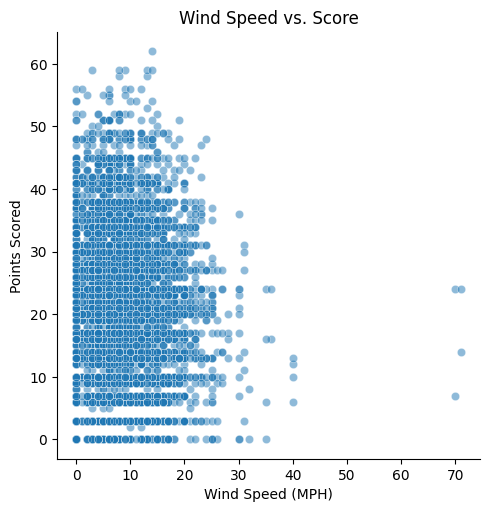

In [27]:
ax = sns.relplot(
    x="wind",
    y="score",
    data=df,
    kind="scatter",
    alpha=0.5
)

plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Points Scored")
plt.title("Wind Speed vs. Score")

Somewhat suprisingly, it looks like there is a *very slight* **negative** linear correlation between wind speed and score but it would be fair to say that wind speed doesn't play a factor at all. Will calculate correlation coefficient to confirm.

In [28]:
import numpy as np

np.corrcoef(df['wind'], df['score'])

array([[ 1.        , -0.06683451],
       [-0.06683451,  1.        ]])

With a correlation coefficient of -0.067, it's safe to say that wind speed does not influence the score of a game.